In [12]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [13]:
theta1 = np.linspace(0, 80, 9)
theta2 = np.array([0.0, 3.5, 7.0, 10.5, 12.5, 17.5, 23.0, 30.0, 41.5])

# Convert into radians
theta1 = theta1 * np.pi/180
theta2 = theta2 * np.pi/180

2.289148668910792


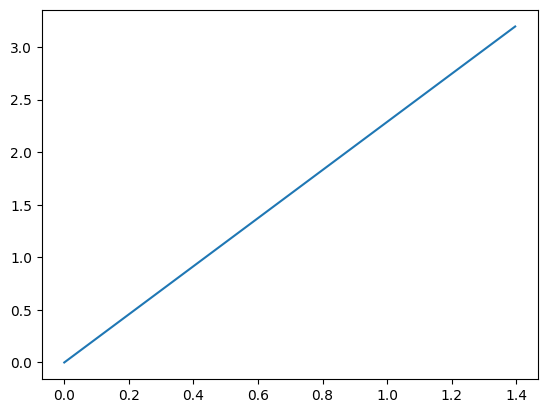

In [25]:
def n_fit(sin, n):
    return sin * n

n_guess = 2

p_opt, p_cov = sp.curve_fit(n_fit, theta2, theta1, sigma = 0.5 * np.pi/180, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
ax.plot(theta1, n_fit(theta1, p_opt[0]))

print(p_opt[0])
